In [1]:
import pandas as pd
import seaborn as sns
import ast
import matplotlib.pyplot as plt
from datasets import load_dataset
#loading dataset
dataset=load_dataset("lukebarousse/data_jobs")

df=dataset['train'].to_pandas()

# Data Cleaning
df['job_posted_date']=pd.to_datetime(df['job_posted_date'])

df['job_skills']=df['job_skills'].apply(lambda skills: ast.literal_eval(skills) if isinstance(skills, str) & pd.notna(skills) else skills)


In [73]:
country='India'
job='Data Analyst'
df_country_job=df[(df['job_country']==country)& (df['job_title_short']==job)]
print(df_country_job['job_health_insurance'].value_counts())
df_country_job

job_health_insurance
False    6121
Name: count, dtype: int64


,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
38,Data Analyst,Data Quality and Governance Analyst 1,India,via Trabajo.org,Full-time,False,India,2023-07-23 13:24:57,False,False,India,None,NaN,NaN,"Jones Lang LaSalle IP, Inc","[sql, python, databricks, power bi, excel, wor...","{'analyst_tools': ['power bi', 'excel', 'word'..."
123,Data Analyst,Data Analytics work from home job/internship a...,Anywhere,via LinkedIn,Part-time,True,India,2023-03-07 13:37:56,False,False,India,None,NaN,NaN,Inoket Solutions Private Limited,"[sql, excel, word, powerpoint, outlook, power bi]","{'analyst_tools': ['excel', 'word', 'powerpoin..."
159,Data Analyst,Data Analyst,"Hyderabad, Telangana, India",via LinkedIn,Contractor,False,India,2023-11-28 13:12:07,False,False,India,None,NaN,NaN,Fusion Plus Solutions Inc,[sql],{'programming': ['sql']}
171,Data Analyst,Data Base work from home job/internship at Mga...,Anywhere,via LinkedIn,Full-time,True,India,2023-01-14 13:11:58,False,False,India,None,NaN,NaN,Mgadz Inc,"[sas, sas, sql]","{'analyst_tools': ['sas'], 'programming': ['sa..."
194,Data Analyst,Data Analyst,India,via BeBee India,Full-time,False,India,2023-06-20 13:11:10,False,False,India,None,NaN,NaN,QuEST Global Services Pte. Ltd,"[python, sql, excel, ms access, powerpoint]","{'analyst_tools': ['excel', 'ms access', 'powe..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785517,Data Analyst,Analyst - Data Analytics/SQL (2-9 yrs),"Gurugram, Haryana, India",via BeBee India,Full-time,False,India,2023-10-16 06:10:56,False,False,India,None,NaN,NaN,iimjobs,[power bi],{'analyst_tools': ['power bi']}
785548,Data Analyst,Data Analyst,"Bengaluru, Karnataka, India",via LinkedIn,Full-time,False,India,2023-01-19 06:14:17,False,False,India,None,NaN,NaN,Artech L.L.C.,"[sql, excel]","{'analyst_tools': ['excel'], 'programming': ['..."
785628,Data Analyst,Data Analyst,"Gurugram, Haryana, India",via LinkedIn,Full-time,False,India,2023-01-09 06:08:12,False,False,India,None,NaN,NaN,GUS Global Services India Pvt. Ltd.,"[r, python, sql, sap, power bi, tableau, excel]","{'analyst_tools': ['sap', 'power bi', 'tableau..."
785691,Data Analyst,Business Intelligence Engineer,"Chennai, Tamil Nadu, India",via LinkedIn,Full-time,False,India,2023-01-23 06:12:09,False,False,India,None,NaN,NaN,Mobile Programming LLC,"[sql, python, shell, sql server, tableau, micr...","{'analyst_tools': ['tableau', 'microstrategy']..."


Text(0, 0.5, ' ')

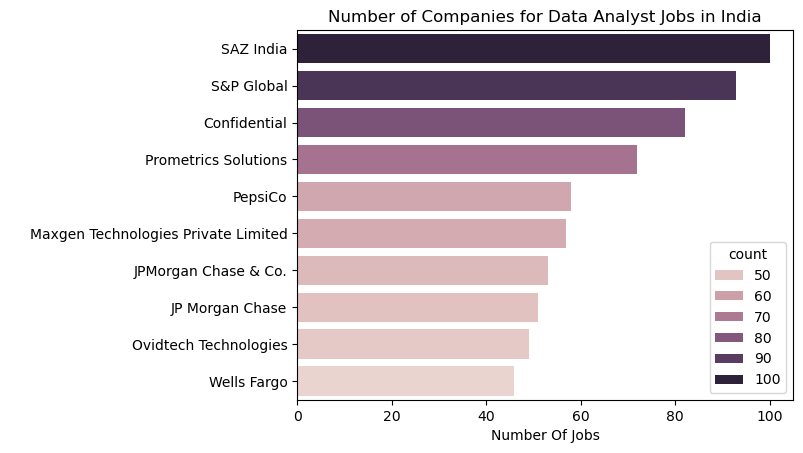

In [69]:
df_company_plot=df_country_job['company_name'].value_counts(ascending=False).head(10).to_frame()
sns.barplot(data=df_company_plot,hue='count',x='count',y='company_name')
plt.title(f'Number of Companies for {job} Jobs in {country}')
plt.xlabel('Number Of Jobs')
plt.ylabel(" ")

Text(0, 0.5, ' ')

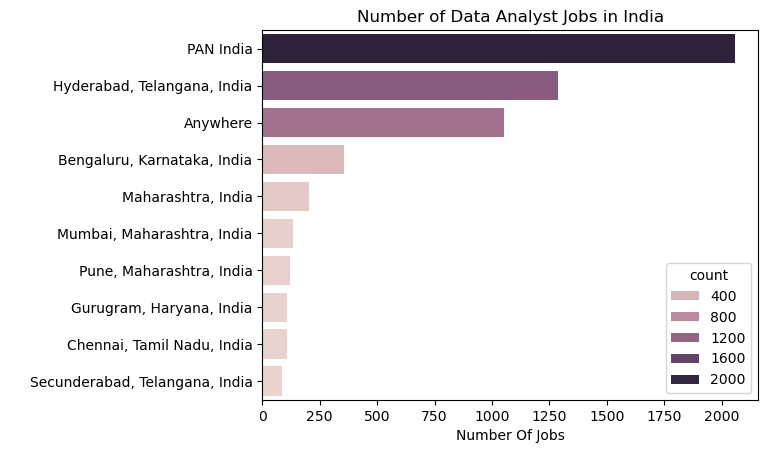

In [68]:
df_location_plot = (
    df_country_job['job_location']
    .value_counts()
    .head(10)
    .to_frame(name='count')
    .reset_index()
    .rename(columns={'index': 'job_location'})  
)

# Replace 
df_location_plot['job_location'] = df_location_plot['job_location'].replace("India", "PAN India")

# Plot
sns.barplot(data=df_location_plot, y='job_location', x='count',hue='count')
plt.title(f'Number of {job} Jobs in {country}')
plt.xlabel('Number Of Jobs')
plt.ylabel(" ")

Text(0, 0.5, ' ')

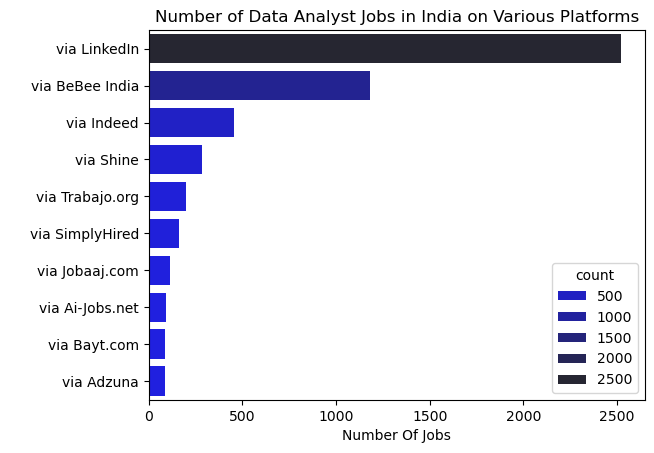

In [64]:
df_country_plot=df_country_job['job_via'].value_counts().head(10).to_frame()
sns.barplot(data=df_country_plot,y='job_via',hue='count',x='count',palette="dark:b_r")
plt.title(f'Number of {job} Jobs in {country} on Various Platforms')
plt.xlabel('Number Of Jobs')
plt.ylabel(" ")

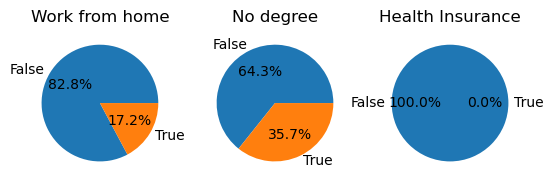

In [ ]:
#   dict.items() (Python dictionaries)

#   Returns a view object of (key, value) pairs.
fig,ax=plt.subplots(1,3)

dict_col={'job_work_from_home':'Work from home',
            'job_no_degree_mention':'No degree',
            'job_health_insurance':'Health Insurance'}


# Using matplolib

for i, (col,title) in enumerate(dict_col.items()):
    # Ensure both False and True exist
    values = df_country_job[col].value_counts().reindex([False, True], fill_value=0)
        #force specific labels (index values) to exist
    ax[i].pie(values,labels=['False','True'],autopct='%1.1f%%')
    ax[i].set_title(title)